<center><h1> Analiza internacionalnih utakmica u posljednih 30ak godina </h1></center>
<center><h3> </h3></center> 
<center><h3> </h3></center> 
<center><h3> Tonino Kaštelan, Matej Kožica, Nikola Tafra</h3></center>
<center><h3> </h3></center> 
<center><h4> Akademska godina 2022./2023.</h4></center>

## Priprema projekta

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

matches_df =  pd.read_csv('./international_matches.csv')

## Opis projekta i podaci

Za potrebe ovog projekta iskorišteni su podaci dostupni na sljedećem linku: https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022.
U sklopu navedenog skupa podataka moguće je pronaći sve informacije o internacionalnim utakmicama odigranih od 08.08.1993. godine. Podaci se sastoje od sljedećih stupaca:

| Stupac   | Opis  |
|----------|:-------------|
| `date`           | Datum kada je utakmica odigrana |
| `home_team`            | Domaća momčad. |
| `away_team`      | Gostujuća momčad. |
| `home_team_continent`      | Kontinent s kojeg dolazi domaća momčad. |
| `away_team_continent`            | Kontinent s kojeg dolazi gostujuća momčad |
| `home_team_fifa_rank`     | FIFA ranking domaće momčadi. |
| `away_team_fifa_rank`            | FIFA ranking gostujuće momčadi. |
| `home_team_total_fifa_points`       | Zbroj FIFA bodova svih igrača domaće momčadi.  |
| `away_team_total_fifa_points` | Zbroj FIFA bodova svih igrača gostujuće momčadi. |
| `home_team_score` | Broj golova domaće momčadi. |
| `away_team_score` | Broj golova gostujuće momčadi |
| `tournament` | Natjecanje u sklopu kojeg je utakmica odigrana. |
| `city` | Grad u kojem je utakmica odigrana. |
| `country` | Država u kojoj je utakmica odigrana. |
| `neutral_location` | NEMAM POJMA ŠTA JE OVO. |
| `shoot_out` | Je li utakmica završila izvođenjem jedanaesteraca? |
| `home_team_result` | Ishod utakmice za domaću momčad. |
| `home_team_goalkeeper_score` | FIFA ranking golmana domaće momčadi. |
| `away_team_goalkeeper_score` | FIFA ranking golmana gostujuće momčadi. |
| `home_team_mean_defense_score` | Prosjek FIFA bodova defenzivnih igrača domaće momčadi. |
| `home_team_mean_offense_score` | Prosjek FIFA bodova ofenzivnih igrača domaće momčadi. |
| `home_team_mean_midfield_score` | Prosjek FIFA bodova veznih igrača domaće momčadi. |
| `away_team_mean_defense_score` | Prosjek FIFA bodova defenzivnih igrača gostujuće momčadi. |
| `away_team_mean_offense_score` | Prosjek FIFA bodova ofenzivnih igrača gostujuće momčadi. |
| `away_team_mean_midfield_score` | Prosjek FIFA bodova veznih igrača gostujuće momčadi. |

**Gradovi u kojima je odigrano najviše internacionalnih utakmica**

**Gradovi u kojima je odigrano najmanje internacionalnih utakmica**

**Države u kojima je odigrano najviše internacionalnih utakmica**

<AxesSubplot: xlabel='matches_played', ylabel='country'>

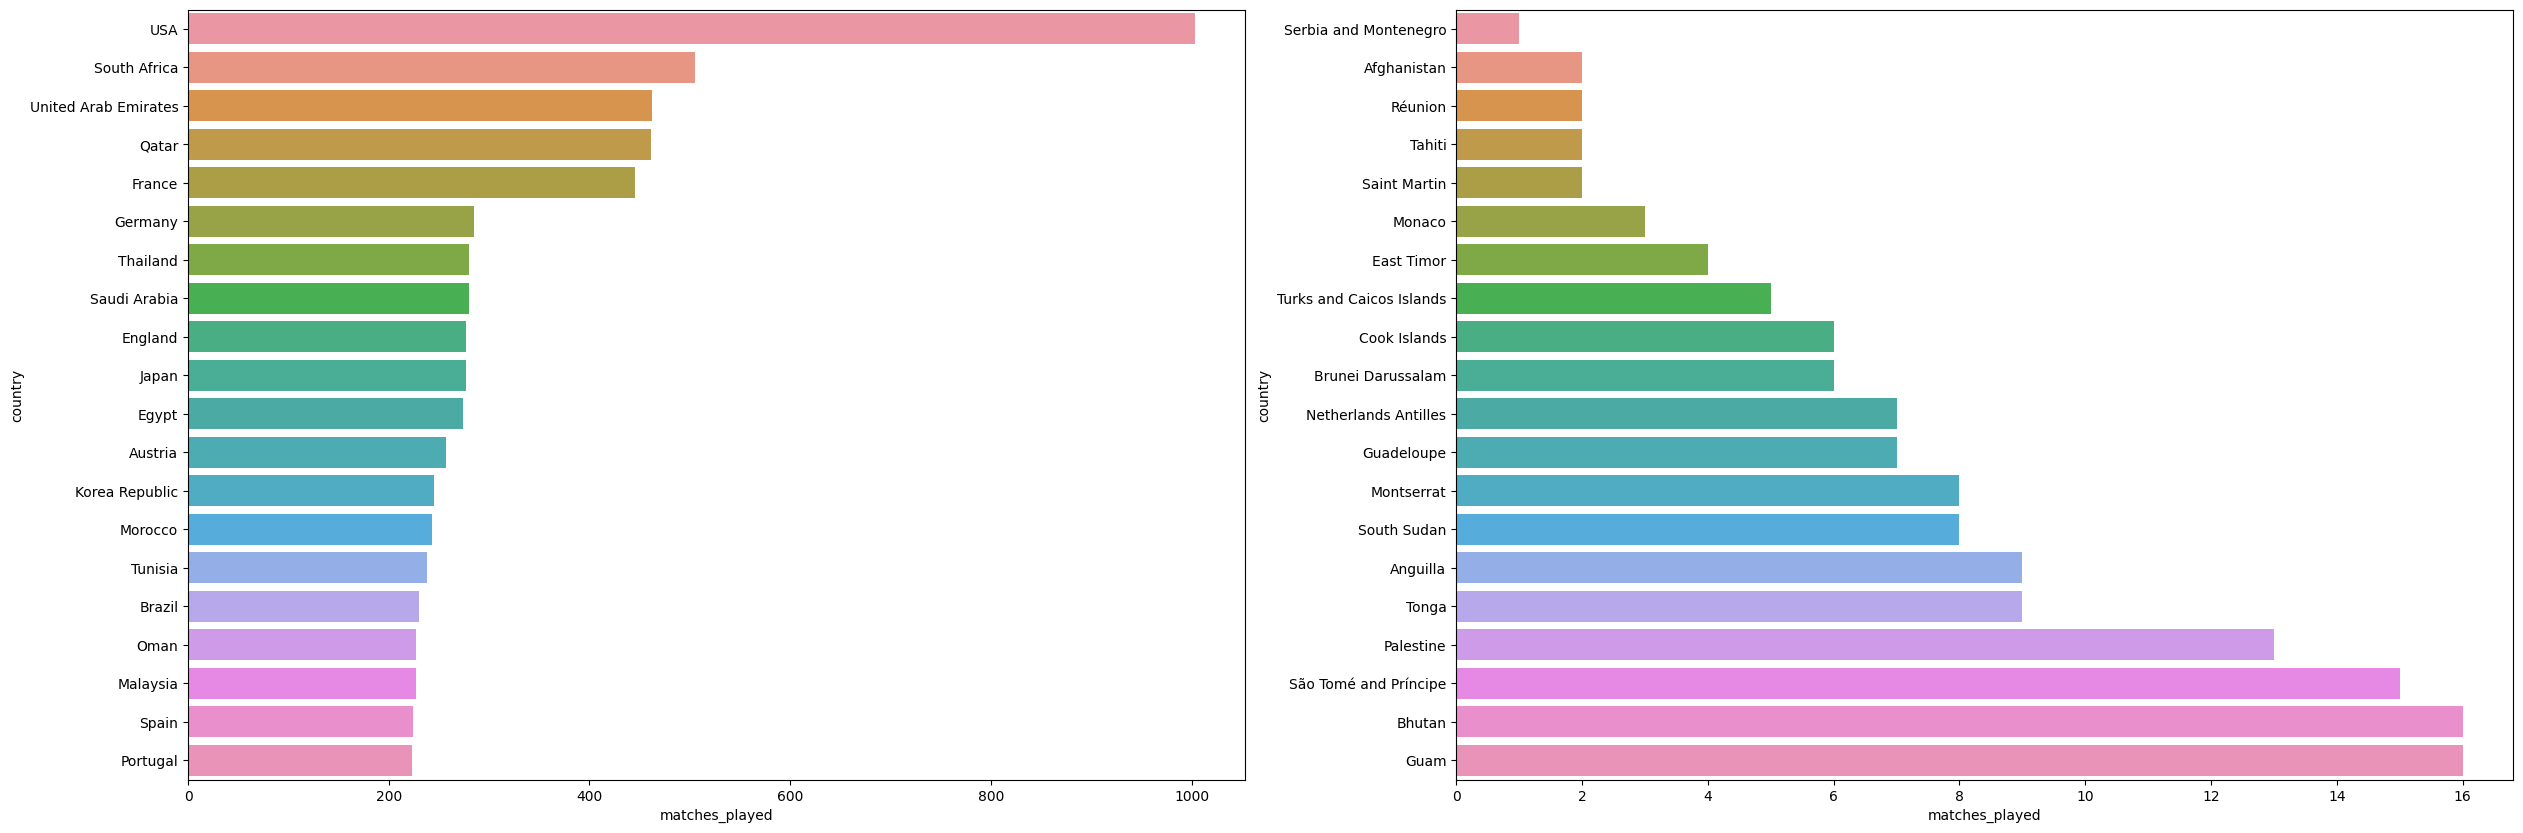

In [25]:
countries_df = matches_df.groupby(["country"]).size().reset_index(name='matches_played')
countries_with_most_games = countries_df.sort_values(by=['matches_played'], ascending=False).head(20)
countries_with_least_games = countries_df.sort_values(by=['matches_played']).head(20)
figure, axes = plt.subplots(1, 2, figsize=(30,10))
sns.barplot(data=countries_with_most_games, x="matches_played", y='country', orient="h", ax=axes[0])
sns.barplot(data=countries_with_least_games, x="matches_played", y="country", orient="h", ax=axes[1])

**Države koje u prosjeku imaju najbolji vezni red po FIFA ocjenama**

**Države koje u prosjeku imaju najbolju obranu po FIFA ocjenama**

**Države koje u prosjeku imaju najbolji napad po FIFA ocjenama**

**Utakmice u kojima je zabijeno najviše golova**

/tmp/ipykernel_2997/1615092087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_on_big_tournaments["total_score"] = matches_on_big_tournaments["home_team_score"] + matches_on_big_tournaments["away_team_score"]


<AxesSubplot: xlabel='match_name', ylabel='total_score'>

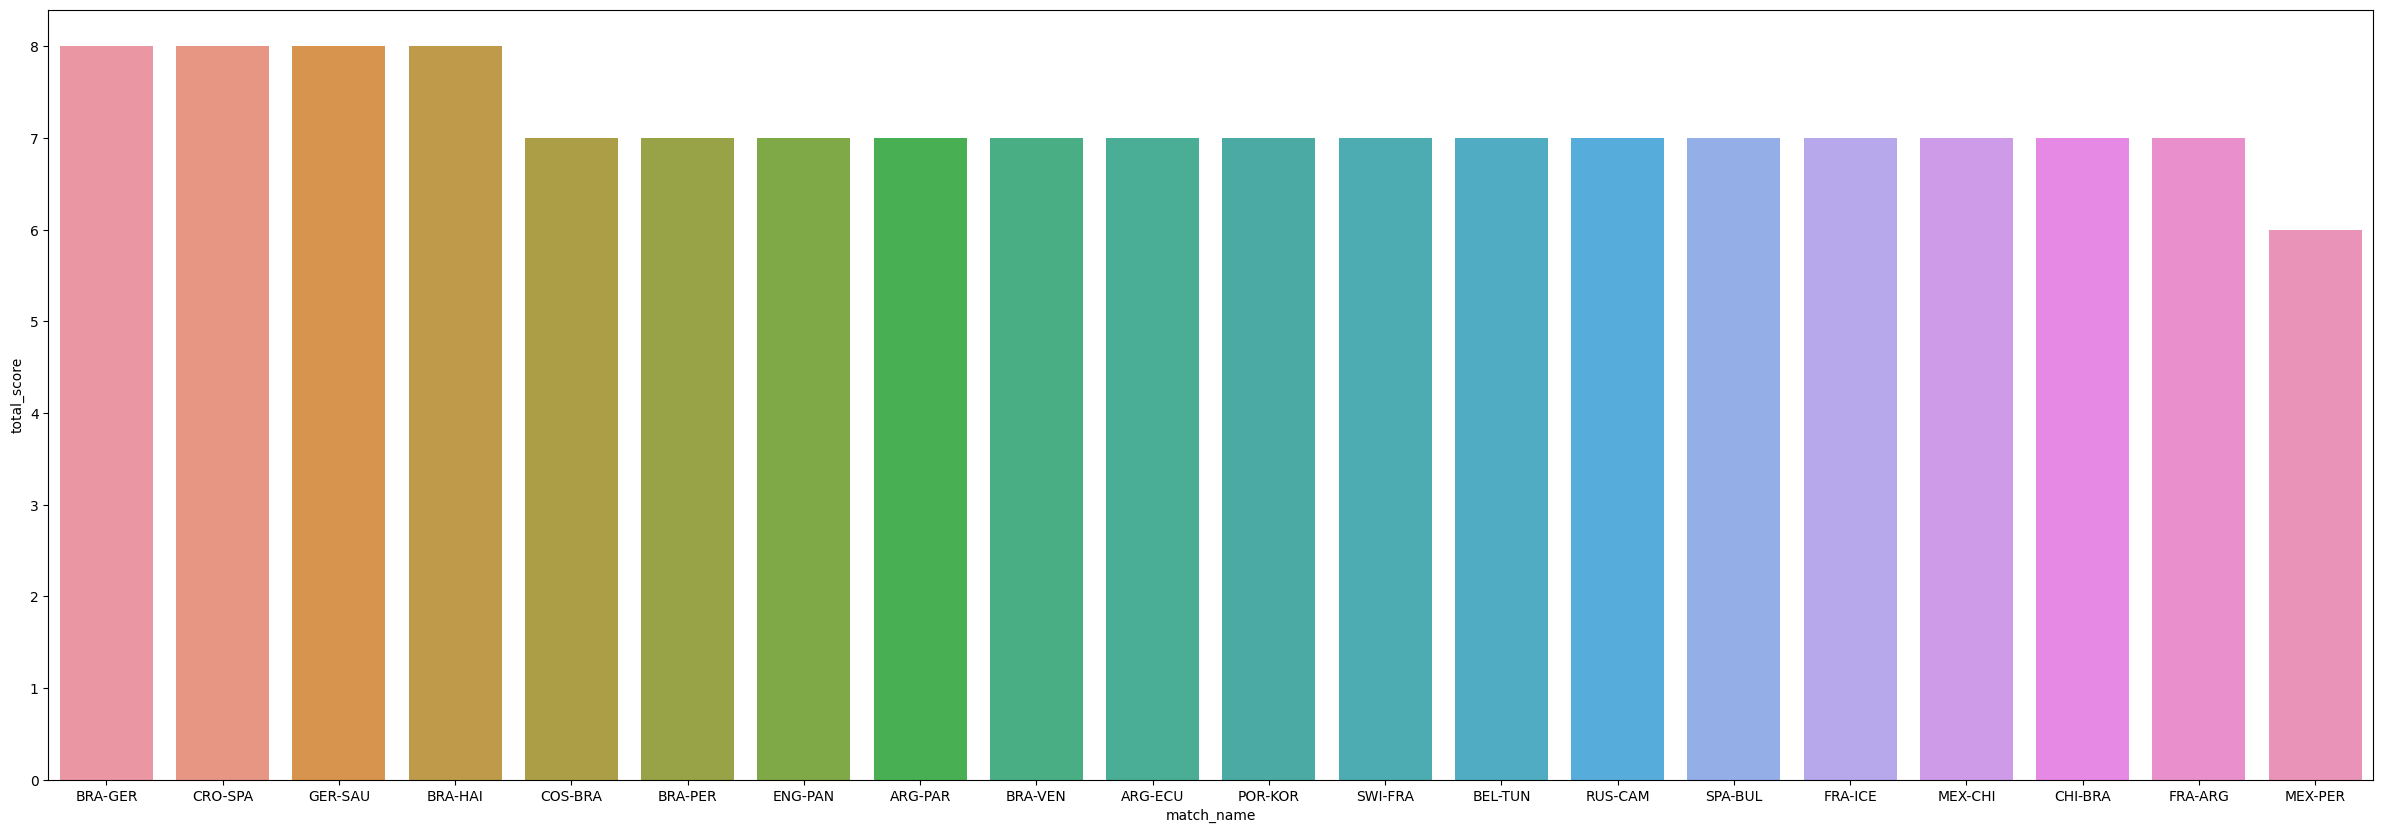

In [48]:
matches_on_big_tournaments = matches_df[matches_df["tournament"].isin(["FIFA World Cup", "Copa América", "UEFA Euro"])]
matches_on_big_tournaments["total_score"] = matches_on_big_tournaments["home_team_score"] + matches_on_big_tournaments["away_team_score"]
matches_with_most_goals_on_big_tournaments = matches_on_big_tournaments.sort_values(by=["total_score"], ascending=False).head(20)
matches_with_most_goals_on_big_tournaments["match_name"] = matches_with_most_goals_on_big_tournaments['home_team'].apply(lambda x: x.upper()[0:3]) + "-" + matches_with_most_goals['away_team'].apply(lambda x: x.upper()[0:3])
figure, axes = plt.subplots(1, 1, figsize=(30,10))
sns.barplot(data=matches_with_most_goals_on_big_tournaments, x="match_name", y="total_score")

**Utakmice u kojima je zabijeno najviše golova**

<AxesSubplot: xlabel='match_name', ylabel='total_score'>

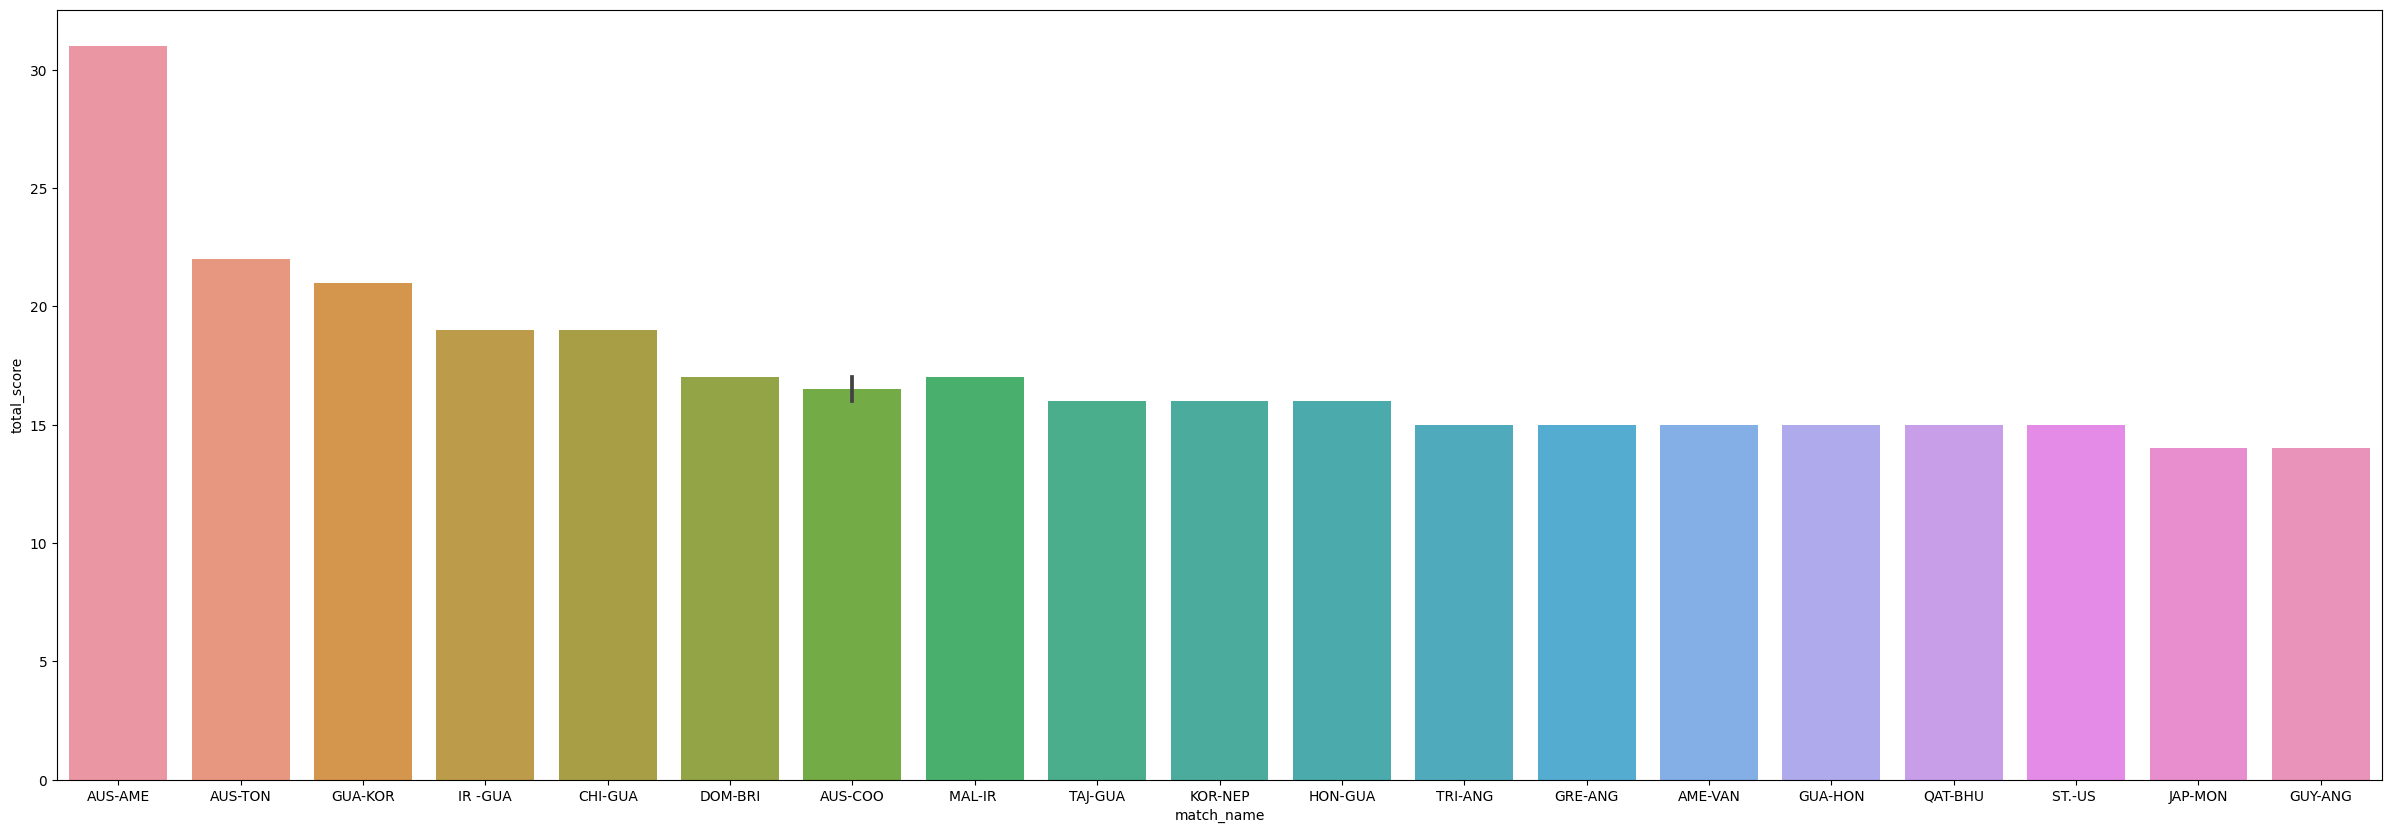

In [12]:
matches = matches_df
matches["total_score"] = matches_df["away_team_score"] + matches_df["home_team_score"]
matches_with_most_goals = matches.sort_values(by=["total_score"], ascending=False).head(20)
matches_with_most_goals["match_name"] = matches_with_most_goals['home_team'].apply(lambda x: x.upper()[0:3]) + "-" + matches_with_most_goals['away_team'].apply(lambda x: x.upper()[0:3])
figure, axes = plt.subplots(1, 1, figsize=(30,10))
sns.barplot(data=matches_with_most_goals, x="match_name", y="total_score")

**Države s najviše zabijenih golova**

**Države s najmanje zabijenih golova**

**Države koje su u jednoj utakmici zabile najviše golova**

**Države koje su u jednoj utakmici zabile najviše golova, a izgubile**

**Mean rating napade, obrane, veznog reda i golmana Hrvatske kroz godine**

/tmp/ipykernel_3077/3412221316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_croatia_as_home_team["year"] = pd.DatetimeIndex(matches_with_croatia_as_home_team["date"]).year
/tmp/ipykernel_3077/3412221316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_croatia_as_away_team["year"] = pd.DatetimeIndex(matches_with_croatia_as_away_team["date"]).year
/tmp/ipykernel_3077/3412221316.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyw

Text(0.5, 0, 'YEAR')

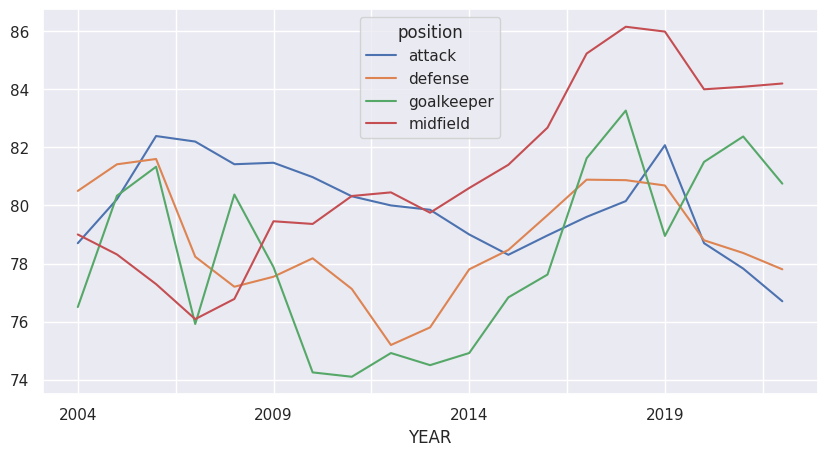

In [21]:
matches_with_croatia_as_home_team = matches_df.loc[matches_df["home_team"] == "Croatia"]
matches_with_croatia_as_away_team = matches_df.loc[matches_df["away_team"] == "Croatia"]

matches_with_croatia_as_home_team["year"] = pd.DatetimeIndex(matches_with_croatia_as_home_team["date"]).year
matches_with_croatia_as_away_team["year"] = pd.DatetimeIndex(matches_with_croatia_as_away_team["date"]).year

croatia_mean_rating_of_attack = pd.DataFrame(pd.concat([matches_with_croatia_as_home_team.groupby('year')["home_team_mean_offense_score"].mean().dropna(), matches_with_croatia_as_away_team.groupby('year')["away_team_mean_offense_score"].mean().dropna()]).groupby('year').mean()).iloc[:, -1].values
croatia_mean_rating_of_defense = pd.DataFrame(pd.concat([matches_with_croatia_as_home_team.groupby('year')["home_team_mean_defense_score"].mean().dropna(), matches_with_croatia_as_away_team.groupby('year')["away_team_mean_defense_score"].mean().dropna()]).groupby('year').mean()).iloc[:, -1].values
croatia_mean_rating_of_midfield = pd.DataFrame(pd.concat([matches_with_croatia_as_home_team.groupby('year')["home_team_mean_midfield_score"].mean().dropna(), matches_with_croatia_as_away_team.groupby('year')["away_team_mean_midfield_score"].mean().dropna()]).groupby('year').mean()).iloc[:, -1].values
croatia_mean_rating_of_goalkeeper = pd.DataFrame(pd.concat([matches_with_croatia_as_home_team.groupby('year')["home_team_goalkeeper_score"].mean().dropna(), matches_with_croatia_as_home_team.groupby('year')["away_team_goalkeeper_score"].mean().dropna()]).groupby('year').mean()).iloc[:, -1].values

years = np.tile(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], 4)
score = np.concatenate((croatia_mean_rating_of_attack, croatia_mean_rating_of_defense, croatia_mean_rating_of_midfield, croatia_mean_rating_of_goalkeeper))
position = np.concatenate((np.tile('attack', int(len(years)/4)), np.tile('defense', int(len(years)/4)), np.tile('midfield', int(len(years)/4)), np.tile('goalkeeper', int(len(years)/4))))

croatia_overall_score_through_years_df = pd.DataFrame({'year': years, 'rate': np.array(score, dtype=float), 'position': position})
croatia_overall_score_through_years_df = croatia_overall_score_through_years_df.pivot("year", "position", "rate")
sns.set(rc={"figure.figsize": [10,5]})
ax = croatia_overall_score_through_years_df.plot()
ax.set_xlabel("SCORE")
ax.set_xlabel("YEAR")

<AxesSubplot: xlabel='Goalkeeper mean score', ylabel='Goals conceeded'>

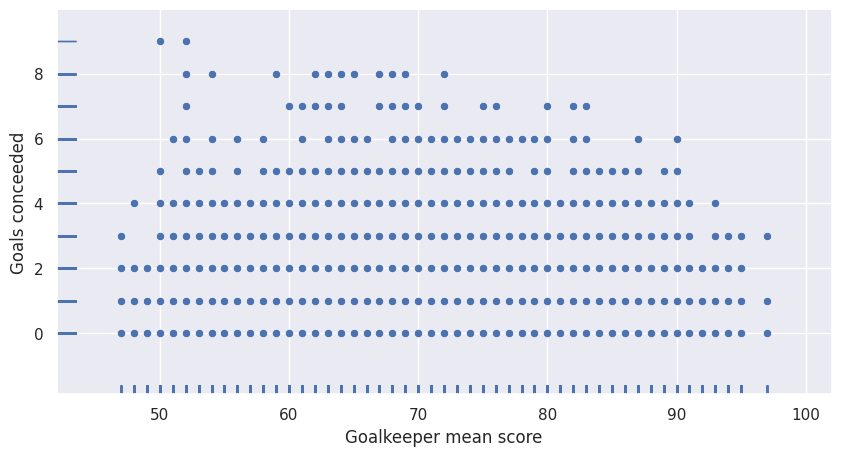

In [23]:
correl_goalkeeper_home = matches_df[["home_team_goalkeeper_score", "away_team_score"]].rename(columns={"home_team_goalkeeper_score": "score", "away_team_score": "goals_conceeded"})
correl_goalkeeper_away = matches_df[["away_team_goalkeeper_score", "home_team_score"]].rename(columns={"away_team_goalkeeper_score": "score", "home_team_score": "goals_conceeded"})
correl_goalkeeper = pd.DataFrame(pd.concat([correl_goalkeeper_home, correl_goalkeeper_away])).dropna().rename(columns={"score": "Goalkeeper mean score", "goals_conceeded": "Goals conceeded"})
sns.scatterplot(data=correl_goalkeeper, x="Goalkeeper mean score", y="Goals conceeded")
sns.rugplot(data=correl_goalkeeper, x="Goalkeeper mean score", y="Goals conceeded")